# Stock Price Prediction Project

## Overview
This project aims to develop a stock price prediction model to assist investors in making informed decisions based on historical stock data. The model utilizes various regression algorithms to forecast future stock prices.


## Dataset
The dataset contains historical stock prices with the following columns:
- **Ticker**: Stock ticker symbol (e.g., AAPL for Apple)
- **Date**: Date of the stock prices
- **Open**: Opening price on that date
- **High**: Highest price during the trading day
- **Low**: Lowest price during the trading day
- **Close**: Closing price at the end of the day
- **Adj Close**: Adjusted closing price
- **Volume**: Number of shares traded

## Steps

### Step 1: **Load the Dataset and Preprocess**

In [1]:
import pandas as pd

# Load the dataset
file_path = (r'C:\Users\ASUS\Downloads\stocks.csv')  # Replace with your file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Step 2: **Feature Engineering**

In [2]:
# Feature engineering: Adding moving averages
df['5_day_MA'] = df['Close'].rolling(window=5).mean()
df['20_day_MA'] = df['Close'].rolling(window=20).mean()

# Display the updated dataframe with new features
print(df[['Date', 'Close', '5_day_MA', '20_day_MA']].tail(10))

          Date       Close    5_day_MA   20_day_MA
238 2023-04-24  106.779999  105.746001  105.330500
239 2023-04-25  104.610001  105.644000  105.408001
240 2023-04-26  104.449997  105.530000  105.562500
241 2023-04-27  108.370003  106.024001  105.886000
242 2023-04-28  108.220001  106.486000  106.231001
243 2023-05-01  107.709999  106.672000  106.416500
244 2023-05-02  105.980003  106.946001  106.470000
245 2023-05-03  106.120003  107.280002  106.520000
246 2023-05-04  105.209999  106.648001  106.533001
247 2023-05-05  106.214996  106.247000  106.398750


## Step 3: **Split the Data into Training and Testing Sets**

In [3]:
from sklearn.model_selection import train_test_split

# Drop rows with NaN values caused by moving averages
df.dropna(inplace=True)

# Define features and target variable
X = df[['Open', 'High', 'Low', 'Volume', '5_day_MA', '20_day_MA']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: **Train Regression Models**

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Train models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

RandomForestRegressor()

## Step 5: **Evaluate the Models**

In [5]:
from sklearn.metrics import mean_absolute_error

# Make predictions
linear_predictions = linear_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

# Calculate MAE
linear_mae = mean_absolute_error(y_test, linear_predictions)
tree_mae = mean_absolute_error(y_test, tree_predictions)
forest_mae = mean_absolute_error(y_test, forest_predictions)

# Display results
print(f"Linear Regression MAE: {linear_mae}")
print(f"Decision Tree MAE: {tree_mae}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression MAE: 1.605555527208571
Decision Tree MAE: 2.8726096775220786
Random Forest MAE: 2.755805075272267


## **Step 6: Visualize Predictions**

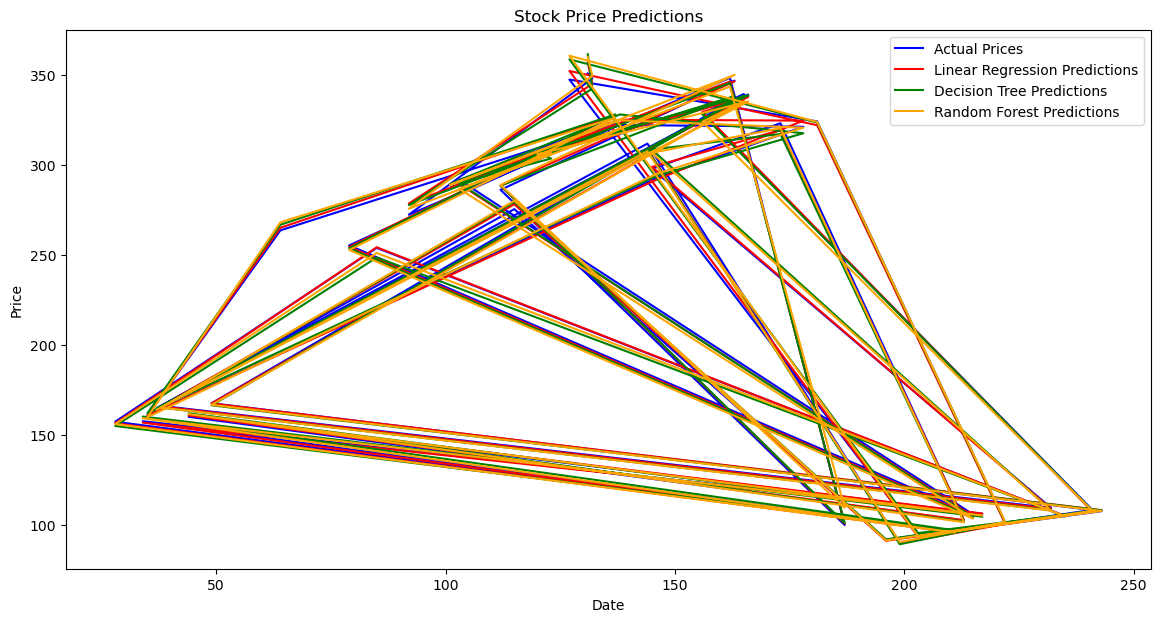

In [13]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, linear_predictions, label='Linear Regression Predictions', color='red')
plt.plot(y_test.index, tree_predictions, label='Decision Tree Predictions', color='green')
plt.plot(y_test.index, forest_predictions, label='Random Forest Predictions', color='orange')
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Conclusion
This project addresses the challenges investors face in predicting stock prices by using a blend of data science and machine learning techniques. The resulting model can assist in identifying potential buying or selling opportunities based on historical trends.